In [1]:
import pandas as pd

In [8]:
import numpy as np

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [4]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

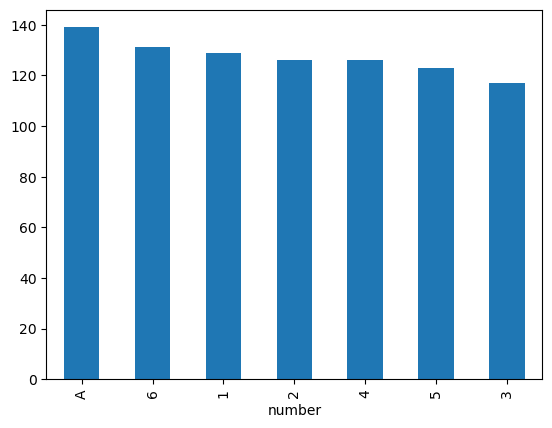

In [5]:
fig = df['number'].value_counts().plot.bar()

In [6]:
df['numerical'] = pd.to_numeric(df["number"], errors='coerce',downcast='integer')

In [7]:
df['numerical']

0      5.0
1      3.0
2      6.0
3      3.0
4      NaN
      ... 
886    3.0
887    3.0
888    1.0
889    2.0
890    3.0
Name: numerical, Length: 891, dtype: float64

In [9]:
df["categorical"] = np.where(df['numerical'].isnull(), df['number'], np.nan)

In [10]:
df['categorical']

0      NaN
1      NaN
2      NaN
3      NaN
4        A
      ... 
886    NaN
887    NaN
888    NaN
889    NaN
890    NaN
Name: categorical, Length: 891, dtype: object

In [13]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)')
df['cabin_cat'] = df['Cabin'].str[0]

df.head()

,Cabin,Ticket,number,Survived,numerical,categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


In [15]:
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'], errors='coerce', downcast='integer')

In [16]:
df['ticket_cat'] = df['Ticket'].apply(lambda s:s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan, df['ticket_cat'])